<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/HealthCare/blob/main/cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter(mean size of the core tumor)

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

Class distribution: 357 benign, 212 malignant

SE = standard error 

worse = "worst" or largest mean value

A tumor can be cancerous or benign. A cancerous tumor is malignant, meaning it can grow and spread to other parts of the body. A benign tumor means the tumor can grow but will not spread.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import time

In [ ]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model 
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    print('\t\t\t\tclassification report\n','*'*80,'\n',classification_report(actual,predicted))
  
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)
  return model


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/HealthCare/main/Data/cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [54]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

so we can drop the unnamed collumn as it contains only null values and id as it has unique values

In [ ]:
df=df.drop(['Unnamed: 32','id'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


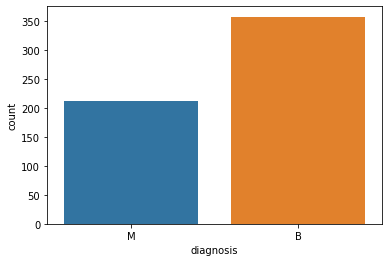

In [ ]:
sns.countplot(df["diagnosis"])

In [ ]:
dependet_variables=list(df.columns)[1:]
dependet_variables

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
for i in dependet_variables:
  print(df.groupby("diagnosis")[i].median().reset_index(),'\n')

  diagnosis  radius_mean
0         B       12.200
1         M       17.325 

  diagnosis  texture_mean
0         B         17.39
1         M         21.46 

  diagnosis  perimeter_mean
0         B           78.18
1         M          114.20 

  diagnosis  area_mean
0         B      458.4
1         M      932.0 

  diagnosis  smoothness_mean
0         B          0.09076
1         M          0.10220 

  diagnosis  compactness_mean
0         B           0.07529
1         M           0.13235 

  diagnosis  concavity_mean
0         B         0.03709
1         M         0.15135 

  diagnosis  concave points_mean
0         B              0.02344
1         M              0.08628 

  diagnosis  symmetry_mean
0         B         0.1714
1         M         0.1899 

  diagnosis  fractal_dimension_mean
0         B                0.061540
1         M                0.061575 

  diagnosis  radius_se
0         B     0.2575
1         M     0.5472 

  diagnosis  texture_se
0         B      1.1080
1     

by setting a threshold value to each of the parameter we can predict weather the cell is m/b or we can also use the machine learning model to get better results 

In [ ]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

checking weather it is divided equaly or not

In [ ]:
y_test.value_counts()/y_test.value_counts().sum()

B    0.62766
M    0.37234
Name: diagnosis, dtype: float64

In [ ]:
y_train.value_counts()/y_train.value_counts().sum()

B    0.627297
M    0.372703
Name: diagnosis, dtype: float64

# logestic regression

## scaling the data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
lr_scaler=MinMaxScaler()

In [ ]:
X_train_scaled=lr_scaler.fit_transform(X_train)
X_test_scaled=lr_scaler.transform(X_test)

## model creation and evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model=LogisticRegression()

In [ ]:
lr_model=train_and_score(lr_model,X_test_scaled,X_train_scaled,y_test,y_train)

Training time: 0.0002min
				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           B       0.96      1.00      0.98       239
           M       0.99      0.93      0.96       142

    accuracy                           0.97       381
   macro avg       0.98      0.96      0.97       381
weighted avg       0.97      0.97      0.97       381



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           B       0.94      1.00      0.97       118
           M       1.00      0.89      0.94        70

    accuracy                           0.96    

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l2'],'max_iter':[1000]} 

In [ ]:
lr_model=LogisticRegression()

In [ ]:
lr_grid=GridSearchCV(lr_model,param_grid=param_dict,n_jobs=-1, cv=5, verbose = 5)

In [ ]:
lr_grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000], 'penalty': ['l2']},
             verbose=5)

In [ ]:
lr_grid=train_and_score(lr_grid,X_test_scaled,X_train_scaled,y_test,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time: 0.0268min
The best parameters found out to be : {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.9684894053315107 

				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           B       0.98      1.00      0.99       239
           M       0.99      0.96      0.98       142

    accuracy                           0.98       381
   macro avg       0.99      0.98      0.98       381
weighted avg       0.98      0.98      0.98       381



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
       

# svm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC()

In [ ]:
svc_model_grid=train_and_score(svc_model,X_test_scaled,X_train_scaled,y_test,y_train)

Training time: 0.0001min
				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           B       0.98      1.00      0.99       239
           M       0.99      0.96      0.98       142

    accuracy                           0.98       381
   macro avg       0.99      0.98      0.98       381
weighted avg       0.98      0.98      0.98       381



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           B       0.95      1.00      0.98       118
           M       1.00      0.91      0.96        70

    accuracy                           0.97    

In [59]:
svc_model=SVC()

In [60]:
svc_model.fit(X_train_scaled,y_train)

SVC()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_svc=Pipeline([('scalar1',MinMaxScaler()),
                     ('SCV_classifier',SVC(random_state=0))])

In [ ]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('scalar1', MinMaxScaler()),
                ('SCV_classifier', SVC(random_state=0))])

---
# KNN
---

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
scaler = MinMaxScaler()

In [71]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [73]:
# creating KNN model
knn_model = KNeighborsClassifier(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
train_and_score(knn_grid,X_train_scaled, X_test_scaled, y_train, y_test)

Training time: 0.0882min
The best parameters found out to be : {'n_neighbors': 7}
 
where negative mean squared error is:  0.9679943100995733 

				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           B       0.96      0.99      0.97       118
           M       0.98      0.93      0.96        70

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           B       0.97      0.96    

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 21, 23, 25]})

# saving the model

In [ ]:
import pickle

In [ ]:
filename='brest_cancer_detection.pkl'

In [ ]:
#save
with open(filename,'wb') as f:
    pickle.dump(pipeline_lr,f)

In [ ]:
# load
with open(filename ,'rb') as f:
    clf2 = pickle.load(f)